# 3D Basis
Define some basis vectors for a 3D space - and show that they are complete (i.e., resolve the identity)

## Define Basis

In [158]:
x = [1.0, 0.0, 0.0]
y = [0.0, 1.0, 0.0]
z = [0.0, 0.0, 1.0]

3-element Array{Float64,1}:
 0.0
 0.0
 1.0

In [159]:
x*x' + y*y' + z*z'

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

## Create random vector in this basis

In [160]:
# all numbers will be positive - meaning it will be in positive quadrant
v = rand(3)

3-element Array{Float64,1}:
 0.12527461072277712
 0.6455124206047502
 0.9927349122607008

Show that the projectors do what we expect:

In [161]:
x * x' * v

3-element Array{Float64,1}:
 0.12527461072277712
 0.0
 0.0

In [162]:
y * y' * v

3-element Array{Float64,1}:
 0.0
 0.6455124206047502
 0.0

In [163]:
z * z' * v

3-element Array{Float64,1}:
 0.0
 0.0
 0.9927349122607008

## Define a new random orthonormal basis

start with 3 random vectors

In [164]:
u1 = rand(3) .- .5
u2 = rand(3) .- .5
u3 = rand(3) .- .5;

these are not orthonormal!

In [165]:
u1'*u1

0.2780775299802672

In [166]:
u1'*u2

-0.2828965518879313

First let's orthogonalize them using a method called Gram-Schmidt [read more](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process).

In [167]:
# project out u1 from u2
u2 = u2 - u1*u1'*u2 / (u1'*u1)

# project out u2 and u1 from u3
u3 = u3 - u1*u1'*u3 / (u1'*u1)
u3 = u3 - u2*u2'*u3 / (u2'*u2);

In [168]:
# see that they are orthogonal now:
println(u1'*u2)
println(u1'*u3)
println(u2'*u3)

-1.0408340855860843e-17
-4.163336342344337e-17
5.204170427930421e-18


Now normalize each vector

In [169]:
u1 = u1 / sqrt(u1'*u1)
u2 = u2 / sqrt(u2'*u2)
u3 = u3 / sqrt(u3'*u3);

In [170]:
println(u1'*u1)
println(u2'*u2)
println(u3'*u3)

1.0
0.9999999999999999
1.0


Our basis looks completely different from the original x, y, z basis

In [171]:
# Create matrix where the columns are the basis vectors
basis1 = hcat(x, y, z) 
basis2 = hcat(u1, u2, u3);

display(basis1)
display(basis2)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Array{Float64,2}:
 0.719007   0.414842  -0.557616
 0.041243   0.77544    0.630073
 0.693778  -0.476025   0.540437

however, both are orthonormal

In [172]:
display(basis1'*basis1)
display(basis2'*basis2)

3×3 Array{Float64,2}:
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0

3×3 Array{Float64,2}:
  1.0          -1.66533e-16  -3.88578e-16
 -1.66533e-16   1.0           2.22045e-16
 -3.88578e-16   2.22045e-16   1.0

## Now rotate our vector to this new random orthonormal basis

$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$

Remember that in order to perform a change of basis, we need to find the overlap matrix 
$$
b_{i} = \sum_j S_{ij} c_{j}
$$
where 
$$ \require{physics} S_{ij} = \braket{w_i}{u_j} $$

In [173]:
# Define overlap matrix
S = basis2'*basis1

display(S)

# this matrix is orthogonal
display(S'*S)
display(S*S')

3×3 Array{Float64,2}:
  0.719007  0.041243   0.693778
  0.414842  0.77544   -0.476025
 -0.557616  0.630073   0.540437

3×3 Array{Float64,2}:
  1.0          -3.88578e-16   1.66533e-16
 -3.88578e-16   1.0          -1.66533e-16
  1.66533e-16  -1.66533e-16   1.0

3×3 Array{Float64,2}:
  1.0          -1.66533e-16  -3.88578e-16
 -1.66533e-16   1.0           2.22045e-16
 -3.88578e-16   2.22045e-16   1.0

In [174]:
# now convert our vector from basis1 to basis2
v2 = S*v

3-element Array{Float64,1}:
 0.805433836566942
 0.07995872572788154
 0.8733759536196528

Here, we can show that the two vectors look different _if_ plotted in the same coordinate system

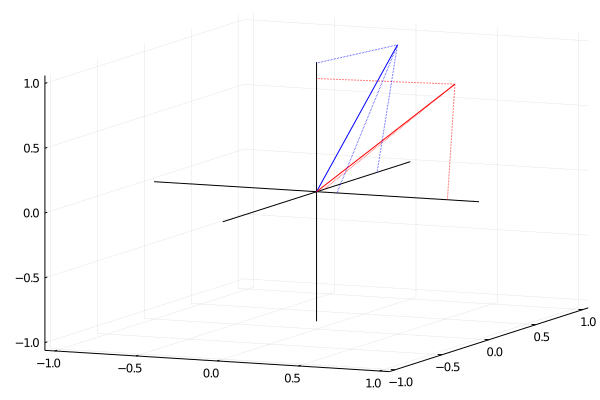

In [175]:
using Plots


plot3d([0], [0], [0], color="black")
plot3d!([-1,1], [0,0], [0,0], color="black")
plot3d!([0,0], [-1,1], [0,0], color="black")
plot3d!([0,0], [0,0], [-1,1], color="black")

plot3d!([0,v[1]], [0,v[2]], [0,v[3]], color="blue")
plot3d!([0,v2[1]], [0,v2[2]], [0,v2[3]], color="red")

points1 = hcat(zeros(3),v)
points2 = hcat(zeros(3),v2)

plot3d!([v2[1],v2[1]], [0,v2[2]], [0,v2[3]], color="red", linestyle=:dot)
plot3d!([0,v2[1]], [v2[2],v2[2]], [0,v2[3]], color="red", linestyle=:dot)
plot3d!([0,v2[1]], [0,v2[2]], [v2[3],v2[3]], color="red", linestyle=:dot)


plot3d!([v[1],v[1]], [0,v[2]], [0,v[3]], color="blue", linestyle=:dot)
plot3d!([0,v[1]], [v[2],v[2]], [0,v[3]], color="blue", linestyle=:dot)
plot3d!([0,v[1]], [0,v[2]], [v[3],v[3]], color="blue", linestyle=:dot, legend=false)

# plot3d!([0,v2[1]], [0,v2[2]], [0,0], color="red", linestyle=:dot)
# plot3d!([0,v2[1]], [0,0], [0,v2[3]], color="red", linestyle=:dot)
# plot3d!([0,0], [0,v2[2]], [0,v2[3]], color="red", linestyle=:dot)
# plot3d!([0,v2[1]], [v2[2],v2[2]], [0,v2[3]], color="red", linestyle=:dot)
# plot3d!([0,v2[1]], [0,v2[2]], [v2[3],v2[3]], color="red", linestyle=:dot)
